<a href="https://colab.research.google.com/github/sy-veronica/Cohort_Analysis/blob/main/Cohort_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 프로젝트 목적**
- 데이터 정제 : 파키스탄 전자상거래 주문 데이터를 분석 가능하도록 정제
- 데이터 분석 : 해당 기업의 2년간의 매출데이터를 바탕으로 코호트 분석을 진행
- 분석 목적 : 연중 고객이 가장 많이 몰리는 시기를 찾고, 그 원인을 분석하여 고객의 유입을 더욱 장려한다.


# **2. 라이브러리 설치 & 데이터 불러오기**

In [286]:
# (1) 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [287]:
# (2) 데이터셋 불러오기
df_original = pd.read_csv('/content/drive/MyDrive/data/Pakistan Largest Ecommerce Dataset.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [314]:
# (3) 데이터셋 확인하기
print(f'Data shape : {df_original.shape}')
df_original.head(3)

Data shape : (1048575, 26)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [315]:
# (4) 원본 데이터 보호를 위해 데이터 copy
df = df_original.copy()

# **3. 데이터 정제하기**

In [316]:
# (1) 데이터의 전체적인 정보 확인
df.info()

# 결측치 처리 : 전부 Null값으로 구성된 행과 열은 삭제하고, 남아있는 Null값의 경우 기재값을 통일한다.
# 데이터 타입 : 각 컬럼별 데이터 타입이 알맞은지 확인하고, 수정한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [317]:
# (2) 결측치 처리 : 전부 Null로 구성된 행과 열 삭제
df.dropna(axis=0, how='all', inplace=True) # 행
df.dropna(axis=1, how='all', inplace=True) # 열
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [318]:
# (3-1) Dtype 확인 
# 날짜 정보가 들어있는 컬럼의 Dtype이 object임을 확인, 분석에 용이하도록 날짜형 데이터로 타입 변경 진행

df[['item_id', 'created_at', 'Working Date', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY']].sample(3)

,item_id,created_at,Working Date,Year,Month,Customer Since,M-Y,FY
390801,684299.0,11/24/2017,11/24/2017,2017.0,11.0,2017-11,11-2017,FY18
356346,643487.0,11/19/2017,11/19/2017,2017.0,11.0,2017-10,11-2017,FY18
482030,788550.0,3/16/2018,3/16/2018,2018.0,3.0,2016-11,3-2018,FY18


In [319]:
# (3-2) Dtype 변환

df['created_at'] = pd.to_datetime(df['created_at'])
df['Working Date'] = pd.to_datetime(df['Working Date'])
df['Customer Since'] = pd.to_datetime((df['Customer Since'] + '-1').astype(str))
df['M-Y'] = pd.to_datetime((df['M-Y']).astype(str))
df['Year'] = df['created_at'].dt.year
df['Month'] = df['created_at'].dt.month

df[['item_id', 'created_at', 'Working Date', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY']].sample(3)

,item_id,created_at,Working Date,Year,Month,Customer Since,M-Y,FY
208788,471868.0,2017-05-19,2017-05-19,2017,5,2017-05-01,2017-05-01,FY17
65555,292830.0,2016-11-20,2016-11-20,2016,11,2016-07-01,2016-11-01,FY17
193180,454320.0,2017-04-24,2017-04-24,2017,4,2016-11-01,2017-04-01,FY17


In [320]:
# (4-1) 남아있는 결측치 확인
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [321]:
# (4-2) 남아있는 결측치 처리
# 분석 목적에 부합하지 않는 (=고객정보 Customer ID가 유실된) 행은 삭제
df.dropna(axis=0, how='any', subset=['Customer ID'], inplace=True)

In [322]:
# (4-3) 남아있는 결측치 처리
# Null값의 표기 통일 ('NaN' → '-')
df.fillna('-', inplace=True)

In [323]:
# (4-4) 남아있는 결측치 처리
# 'NaN'이 아니지만, 정보가 유실된 셀의 경우 Null값과 동일하므로 표기 통일 ('\\N','#REF!' → '-')
df = df.replace('\\N', '-')
df = df.replace('#REF!', '-')

In [324]:
# (5-1) 마무리 : 남아있는 결측치가 있는지 확인
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

In [325]:
# (5-2) 마무리 : 중복 데이터가 존재하는지 확인
df.duplicated().sum()

0

In [326]:
# (5-3) 마무리 : index_reset
df.reset_index(drop=True, inplace=True)

# **4.코호트 분석**

In [334]:
# (1) 코호트 분석에 필수적인 정보 추출 (고객정보, 첫 주문일, 주문일)
cohort = df[['Customer Since', 'M-Y', 'Customer ID']]
cohort.head(3)

,Customer Since,M-Y,Customer ID
0,2016-07-01,2016-07-01,1.0
1,2016-07-01,2016-07-01,2.0
2,2016-07-01,2016-07-01,3.0


In [335]:
# (2) 컬럼명 수정
cohort.rename({'Customer Since':'first_order', 'M-Y':'orders'} , axis=1, inplace=True)
cohort.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,first_order,orders,Customer ID
0,2016-07-01,2016-07-01,1.0
1,2016-07-01,2016-07-01,2.0
2,2016-07-01,2016-07-01,3.0


In [336]:
# (3-1) 첫 주문일, 주문일 정보로 그룹핑한 테이블(grouped) 생성
grouped = cohort.groupby(['first_order', 'orders'])

In [337]:
# (3-2) 첫 주문일, 주문일 정보로 그룹핑한 테이블에서 고객 ID 갯수 구하기
cohort = grouped['Customer ID'].nunique()
cohort = cohort.reset_index()
cohort

,first_order,orders,Customer ID
0,2016-07-01,2016-07-01,2406
1,2016-07-01,2016-08-01,468
2,2016-07-01,2016-09-01,391
3,2016-07-01,2016-10-01,325
4,2016-07-01,2016-11-01,472
...,...,...,...
346,2018-06-01,2018-07-01,164
347,2018-06-01,2018-08-01,63
348,2018-07-01,2018-07-01,1768
349,2018-07-01,2018-08-01,118


In [338]:
# (3-3) 첫 주문일, 주문일, 주문한 고객수로 테이블 생성
cohort = grouped['Customer ID'].nunique()
cohort = cohort.reset_index()
cohort.rename({'Customer ID' : 'customers'}, axis=1, inplace=True)
cohort.head(3)

,first_order,orders,customers
0,2016-07-01,2016-07-01,2406
1,2016-07-01,2016-08-01,468
2,2016-07-01,2016-09-01,391


In [339]:
# (4) 첫 주문일을 기준으로 단위기간(1개월) 갯수 구하기
each_period = cohort['first_order'].value_counts().sort_index()
each_period

2016-07-01    26
2016-08-01    25
2016-09-01    24
2016-10-01    23
2016-11-01    22
2016-12-01    21
2017-01-01    20
2017-02-01    19
2017-03-01    18
2017-04-01    17
2017-05-01    16
2017-06-01    15
2017-07-01    14
2017-08-01    13
2017-09-01    12
2017-10-01    11
2017-11-01    10
2017-12-01     9
2018-01-01     8
2018-02-01     7
2018-03-01     6
2018-04-01     5
2018-05-01     4
2018-06-01     3
2018-07-01     2
2018-08-01     1
Name: first_order, dtype: int64

In [340]:
# (5-1) cohort period 리스트 만들기
Cohort_period = []

for x in each_period:
    for y in range(x):
        Cohort_period.append(y)

In [341]:
# (5-2) cohort_period 열 추가
cohort['cohort_period'] = Cohort_period
cohort.head(10)

,first_order,orders,customers,cohort_period
0,2016-07-01,2016-07-01,2406,0
1,2016-07-01,2016-08-01,468,1
2,2016-07-01,2016-09-01,391,2
3,2016-07-01,2016-10-01,325,3
4,2016-07-01,2016-11-01,472,4
5,2016-07-01,2016-12-01,277,5
6,2016-07-01,2017-01-01,250,6
7,2016-07-01,2017-02-01,212,7
8,2016-07-01,2017-03-01,244,8
9,2016-07-01,2017-04-01,251,9


In [342]:
# (6-1) cohort의 행과 열에 들어갈 값을 인덱스로 설정
cohort.set_index(['first_order', 'cohort_period'], inplace=True)
cohort.head(20)

orders  customers
first_order cohort_period                      
2016-07-01  0             2016-07-01       2406
            1             2016-08-01        468
            2             2016-09-01        391
            3             2016-10-01        325
            4             2016-11-01        472
            5             2016-12-01        277
            6             2017-01-01        250
            7             2017-02-01        212
            8             2017-03-01        244
            9             2017-04-01        251
            10            2017-05-01        244
            11            2017-06-01        179
            12            2017-07-01        171
            13            2017-08-01        156
            14            2017-09-01         73
            15            2017-10-01        109
            16            2017-11-01        213
            17            2017-12-01         93
            18            2018-01-01         71
            19            2018-02-01         57

In [343]:
# (6-2) 코호트 테이블 값으로 들어갈 컬럼을 기준으로 unstack 진행하기
cohort = cohort['customers'].unstack(1)
cohort

cohort_period,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
first_order,,,,,,,,,,,,,,,,,,,,,
2016-07-01,2406.0,468.0,391.0,325.0,472.0,277.0,250.0,212.0,244.0,251.0,...,213.0,93.0,71.0,57.0,88.0,60.0,90.0,69.0,51.0,55.0
2016-08-01,3097.0,396.0,274.0,422.0,218.0,188.0,153.0,169.0,158.0,175.0,...,69.0,61.0,54.0,74.0,54.0,66.0,46.0,35.0,43.0,NaN
2016-09-01,4773.0,660.0,1138.0,343.0,290.0,228.0,377.0,347.0,492.0,245.0,...,118.0,116.0,163.0,94.0,175.0,84.0,72.0,100.0,NaN,NaN
2016-10-01,2593.0,520.0,195.0,170.0,132.0,172.0,151.0,177.0,83.0,89.0,...,38.0,52.0,42.0,56.0,34.0,23.0,28.0,NaN,NaN,NaN
2016-11-01,14697.0,1232.0,635.0,537.0,645.0,622.0,924.0,497.0,540.0,532.0,...,320.0,181.0,308.0,157.0,117.0,147.0,NaN,NaN,NaN,NaN
2016-12-01,2548.0,254.0,150.0,149.0,101.0,113.0,57.0,67.0,63.0,32.0,...,23.0,33.0,27.0,14.0,22.0,NaN,NaN,NaN,NaN,NaN
2017-01-01,2410.0,244.0,136.0,132.0,125.0,85.0,71.0,70.0,45.0,50.0,...,46.0,24.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,2843.0,281.0,145.0,125.0,85.0,87.0,76.0,36.0,41.0,111.0,...,30.0,24.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,4526.0,394.0,277.0,148.0,155.0,155.0,55.0,85.0,220.0,65.0,...,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


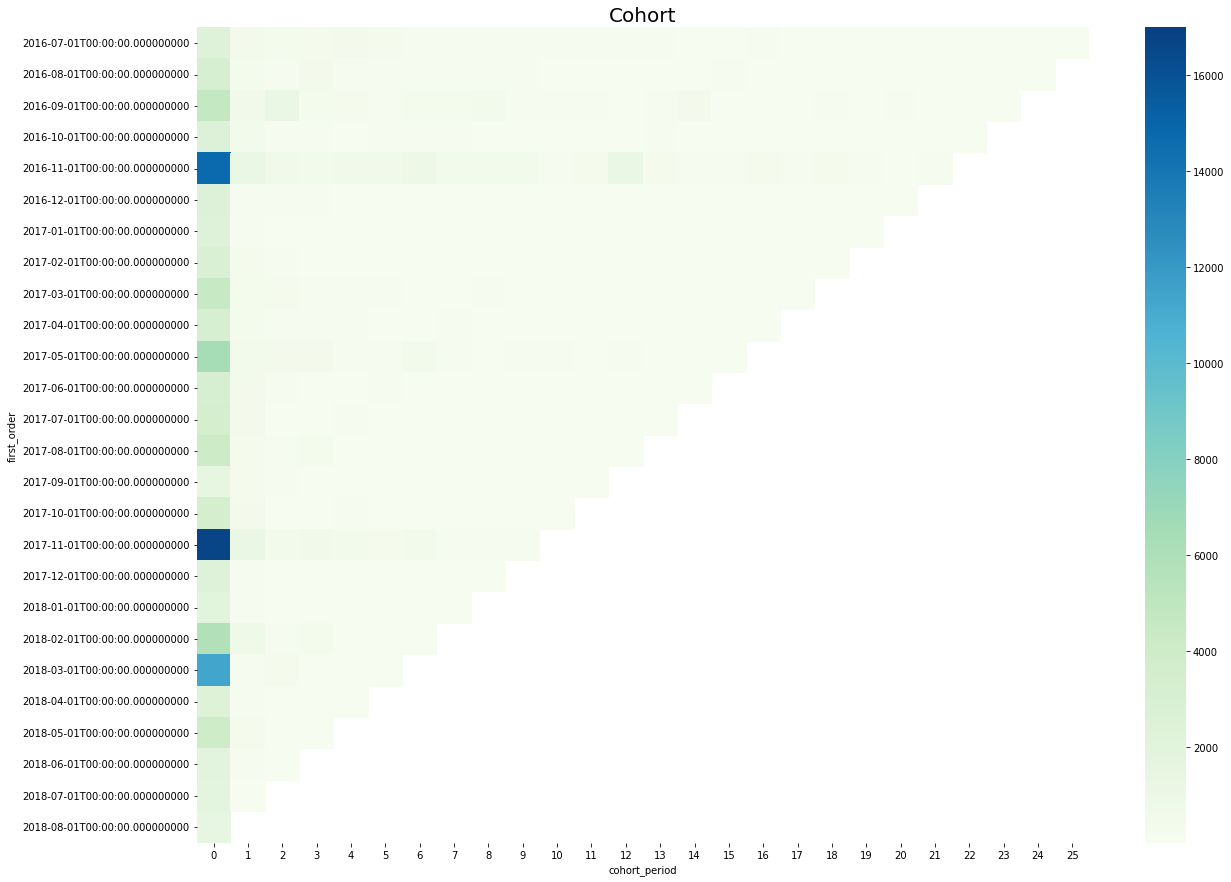

In [351]:
plt.figure(figsize=(20,15))
plt.title('Cohort', fontsize=20)
sns.heatmap(cohort, vmin=10, vmax=17000, cmap='GnBu')
plt.show()

# 매해 11월이 고객이 가장 많은 주문을 하는 것을 알 수 있다.
# 5월, 3월도 주문이 많은 시기임을 알 수 있다.
# 첫번째 구매 이후, 재구매율이 약 10% 정도

In [ ]:
# (6-3) 코호트 테이블의 값을 백분율로 환산
user_retention = cohort.divide(cohort[0], axis=0)
user_retention

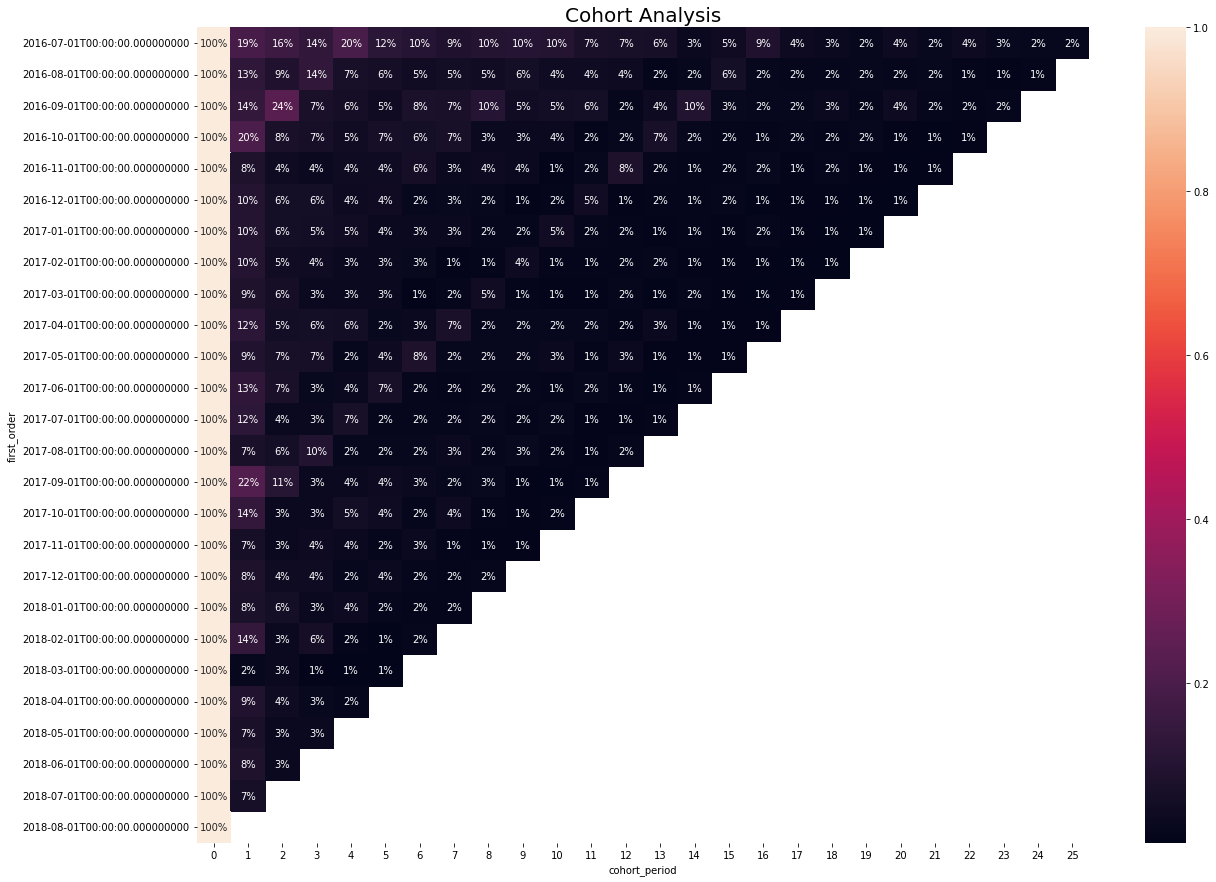

In [352]:
plt.figure(figsize=(20,15))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

# **5. 데이터 설명**

>### **(1) 데이터셋 정보**
- 설명 : 파키스탄의 전자상거래 웹사이트의 주문 데이터셋
- 출처 : [pakistans-largest-ecommerce-dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset)
- 기간 : 2016.03 ~ 2018.08


>### **(2) 컬럼 정보**
| 컬럼명 | 설명 | 비고 |
|:--|:--:|:--:|
| item_id | 상품 ID |  | 
| status | 주문 상태 |  | 
| created_at | 주문 날짜 |  | 
| sku | 재고 관리 코드 |  | 
| price | 제품 가격 |  | 
| qty_ordered | 주문 수량 |  |
| grand_total | 총계 |  |
| increment_id | 증가 ID |  |
| category_name_1 | 제품 카테고리 |  |
| sales_commission_code | 판매수수료 코드 |  |
| discount_amount | 할인 금액 |  |
| payment_method | 결제 수단 |  |
| Working Date | 영업일 |  |
| BI Status | 사업 상태 |  |
| MV | 주문 금액 |  |
| Year | 주문 연도 |  |
| Month | 주문 월 |  |
| Customer Since | 가입일 |  |
| M-Y  | 주문연월 |  |
| FY | 회계 연도 |  |
| Customer ID | 고객 ID |  |
